# Using Numpy

## Loading & Cleaning Dataset

In [1]:
#Initially imported dataset
import numpy as np
data = np.genfromtxt('bitstampUSD_1-min_data_2012-01-01_to_2020-12-31.csv',delimiter=',',skip_header=1)

#Total rows and columns in the raw dataset
print(data.shape)

(4727777, 8)


In [2]:
#Cleaning rows with NaN cells
data = data[~np.isnan(data).any(axis=1)]

#Total rows and columns in the dataset after removing columns containing NaN values
print(data.shape)

(3484305, 8)


In [3]:
#Adding year,month and date column to the dataset that are extracted from the unix timestamp
import datetime
year = []
month = []
date = []
for i in data:
    year.append(int(datetime.datetime.fromtimestamp(int(i[0])).strftime('%Y')))
    month.append(int(datetime.datetime.fromtimestamp(int(i[0])).strftime('%m')))
    date.append(int(datetime.datetime.fromtimestamp(int(i[0])).strftime('%d')))
data = np.insert(data,8,year,axis=1)
data = np.insert(data,9,month,axis=1)
data = np.insert(data,10,date,axis=1)

## Analysis

### Lowest opening and highest closing price of Bitcoin for any year (eg 2019)

In [4]:
data_2019 = data[data[:,8] == 2019]
low_open_2019 = np.amin(data_2019, axis=0)[1]
print("Lowest opening price for bitcoin in 2019 is",low_open_2019,"USD")

Lowest opening price for bitcoin in 2019 is 3334.0 USD


In [5]:
high_close_2019 = np.amax(data_2019, axis=0)[4]
print("Highest closing price for bitcoin in 2019 is",high_close_2019,"USD")

Highest closing price for bitcoin in 2019 is 13850.57 USD


### The costliest Bitcoin has ever been

In [6]:
all_time_high = np.amax(data, axis=0)[4]
print("The all time high prize for bitcoin is",all_time_high,"USD")

The all time high prize for bitcoin is 28997.38 USD


### The largest transaction amount of Bitcoin that has taken place within a minute

In [7]:
high_transaction_amount = np.amax(data, axis=0)[6]
print("The highest transaction amount that has taken place in a minute is",high_transaction_amount,"USD")

The highest transaction amount that has taken place in a minute is 10445987.794 USD


### The maximum volume of Bitcoin that has been traded within a minute

In [8]:
high_transaction_volume = np.amax(data, axis=0)[5]
print("The highest volume of transaction that has taken place in a minute is",high_transaction_volume)

The highest volume of transaction that has taken place in a minute is 5853.8521659


### The day when the highest transaction of Bitcoins took place

In [9]:
highest_day_transaction_day = 0
highest_day_transaction_month = 0
highest_day_transaction_year = 0
highest_day_transaction_volume = 0
for x in (2011,2012,2013,2014,2015,2016,2017,2018,2019,2020):
    temp_year = data[data[:,8] == x]
    for y in range(1,13):
        temp_month = temp_year[temp_year[:,9] == y]
        for z in range(1,32):
            temp_day = temp_month[temp_month[:,10] == z]
            temp_total_day_volume = temp_day.sum(axis = 0)[5]
            if temp_total_day_volume > highest_day_transaction_volume:
                highest_day_transaction_volume = temp_total_day_volume
                highest_day_transaction_day = z
                highest_day_transaction_month = y
                highest_day_transaction_year = x
print("The highest transaction for bitcoin has taken place on ",end="")
print(highest_day_transaction_day,end="/")
print(highest_day_transaction_month,end="/")
print(highest_day_transaction_year)
print("The highest volume of transaction that has taken place within a day is",highest_day_transaction_volume)

The highest transaction for bitcoin has taken place on 18/12/2013
The highest volume of transaction that has taken place within a day is 126222.87359623


### The total amount of bussiness that has taken place in Bitcoin

In [10]:
total_transaction_amount = data.sum(axis = 0)[6]
print("The total transaction amount of bitcoin is",total_transaction_amount,"USD")

The total transaction amount of bitcoin is 115528778390.47755 USD


### The total amount of bussiness that has taken place in Bitcoin per annum (eg 2019)

In [11]:
total_transaction_amount_2019 = data_2019.sum(axis = 0)[6]
print("The total transaction amount of bitcoin in 2019 is",total_transaction_amount_2019,"USD")

The total transaction amount of bitcoin in 2019 is 23161289814.82949 USD


### The standard diviation of closing price of Bitcoin

In [12]:
std_close = np.std(data, axis=0)[4]
print("Standard deviation of closing price of bitcoin is",std_close,"USD")

Standard deviation of closing price of bitcoin is 4775.092857605534 USD


### The average of the transaction ammount in a year (eg 2019)

In [13]:
mean_total_transaction_amount_2019 = np.mean(data_2019,axis=0)[6]
print("Mean of the total transaction amount of 2019 is",mean_total_transaction_amount_2019,"USD")

Mean of the total transaction amount of 2019 is 45565.643165395435 USD


### The correlation coefficient of volume of tradded stock and its cost

In [14]:
corrcoef_volume_amount = np.corrcoef(data[:,5],data[:,6])[0][1]
print("The correlation coefficient of volume of traded stock with its cost is", corrcoef_volume_amount)

The correlation coefficient of volume of traded stock with its cost is 0.42593294565324424


# Using Pandas

## Loading & Cleansing Dataset

In [15]:
import pandas as pd
data = pd.DataFrame(data,columns=['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume_(BTC)', 'Volume_(Currency)', 'Weighted_Price', 'year', 'month', 'date'])

In [16]:
# Converting year, month, date column to integer

data[['year', 'month', 'date']] = data[['year', 'month', 'date']].astype(int)

In [17]:
# Converting UNIX timestamp to IST

from datetime import datetime
data.Timestamp = data.Timestamp.apply(lambda d: datetime.fromtimestamp(int(d)).strftime('%Y-%m-%d %H:%M:%S'))

data

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,year,month,date
0,2011-12-31 13:22:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,2011,12,31
1,2011-12-31 21:20:00,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000,2011,12,31
2,2011-12-31 22:29:00,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411,2011,12,31
3,2011-12-31 22:30:00,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000,2011,12,31
4,2012-01-01 09:46:00,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000,2012,1,1
...,...,...,...,...,...,...,...,...,...,...,...
3484300,2020-12-31 05:26:00,28801.47,28829.42,28785.64,28829.42,0.965221,27804.572129,28806.429798,2020,12,31
3484301,2020-12-31 05:27:00,28829.42,28863.90,28829.42,28857.06,2.368831,68332.350629,28846.441863,2020,12,31
3484302,2020-12-31 05:28:00,28850.49,28900.52,28850.49,28882.82,2.466590,71232.784464,28879.056266,2020,12,31
3484303,2020-12-31 05:29:00,28910.54,28911.52,28867.60,28881.30,7.332773,211870.912660,28893.695831,2020,12,31


## Analysis

In [18]:
data.describe()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,year,month,date
count,3.484305e+06,3.484305e+06,3.484305e+06,3.484305e+06,3.484305e+06,3.484305e+06,3.484305e+06,3.484305e+06,3.484305e+06,3.484305e+06
mean,4.570658e+03,4.573721e+03,4.567413e+03,4.570624e+03,9.422676e+00,3.315691e+04,4.570625e+03,2.016820e+03,6.651904e+00,1.574459e+01
std,4.775105e+03,4.778620e+03,4.771352e+03,4.775094e+03,3.101255e+01,1.129107e+05,4.775090e+03,2.291168e+00,3.447070e+00,8.798485e+00
min,3.800000e+00,3.800000e+00,1.500000e+00,1.500000e+00,0.000000e+00,0.000000e+00,3.800000e+00,2.011000e+03,1.000000e+00,1.000000e+00
25%,4.321900e+02,4.324300e+02,4.320000e+02,4.322000e+02,3.917811e-01,4.147936e+02,4.321753e+02,2.015000e+03,4.000000e+00,8.000000e+00
50%,3.085010e+03,3.093250e+03,3.078010e+03,3.084410e+03,1.936719e+00,3.305199e+03,3.085478e+03,2.017000e+03,7.000000e+00,1.600000e+01
75%,8.158010e+03,8.162850e+03,8.152790e+03,8.157310e+03,7.299825e+00,2.158297e+04,8.157964e+03,2.019000e+03,1.000000e+01,2.300000e+01
max,2.899738e+04,2.901032e+04,2.896366e+04,2.899738e+04,5.853852e+03,1.044599e+07,2.898589e+04,2.020000e+03,1.200000e+01,3.100000e+01


### All time lowest opening and highest closing price of Bitcoin

In [19]:
print("All time lowest opening price for bitcoin is",data.min()["Open"],"USD")

All time lowest opening price for bitcoin is 3.8 USD


In [20]:
print("All time highest closing price for bitcoin is",data.max()["Close"],"USD")

All time highest closing price for bitcoin is 28997.38 USD


### The total amount of bussiness that has taken place in Bitcoin per annum

In [21]:
data.groupby(["year"]).sum()[["Volume_(Currency)"]]

,Volume_(Currency)
year,
2011,4.253203e+02
2012,5.756421e+06
2013,1.549843e+09
2014,2.615880e+09
2015,1.545807e+09
2016,1.112246e+09
2017,2.175615e+10
2018,3.076184e+10
2019,2.316129e+10


### The average of the transaction ammount in a year

In [22]:
data.groupby(["year"]).mean()[["Volume_(Currency)"]]

,Volume_(Currency)
year,
2011,106.330084
2012,216.341758
2013,4850.429994
2014,6569.145789
2015,4147.189451
2016,3159.169843
2017,45020.021850
2018,60816.750667
2019,45565.643165


# Visualisation

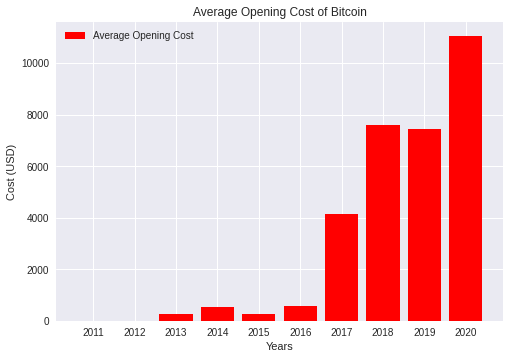

In [23]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

x = np.arange(10)
y = data.groupby(["year"]).mean()["Open"].tolist()
plt.bar(x,y,color='red',label='Average Opening Cost')
x_label = [2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]
plt.xticks(ticks=x,labels=x_label)
plt.xlabel('Years')
plt.ylabel('Cost (USD)')
plt.title('Average Opening Cost of Bitcoin')
plt.legend()
plt.show()

### From the following bar graph, we can conclude that, if a person would want to buy Bitcoin it would be costliest to buy in the year 2020 and cheapest to but in year 2011/2012.

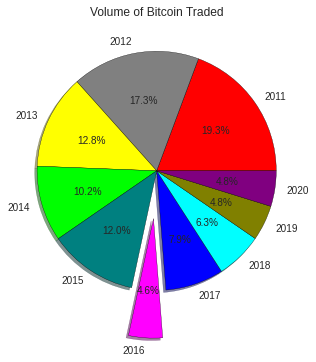

In [24]:
slices = data.groupby(["year"]).mean()["Volume_(BTC)"].tolist()
labels = [2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]
colors = ['#FF0000','#808080','#FFFF00','#00FF00','#008080','#FF00FF','#0000FF','#00FFFF','#808000','#800080']
explode = [0,0,0,0,0,0.4,0,0,0,0]
plt.pie(slices, labels=labels,colors=colors,wedgeprops={'edgecolor':'black'},explode=explode,shadow=True,autopct='%1.1f%%')
plt.title("Volume of Bitcoin Traded")
plt.show()

### From the following pie chart, we can conclude that, maximum volume of Bitcoin was traded in the year 2011 and the minimum bitcoin trade took place in the year 2016.

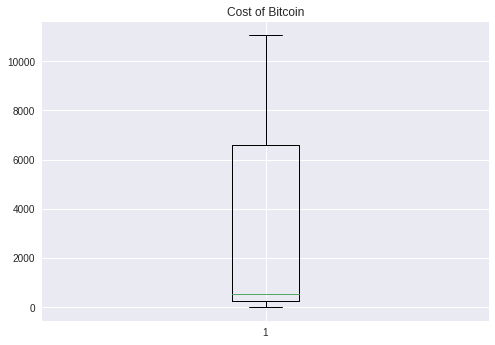

In [25]:
cost = data.groupby(["year"]).mean()["Weighted_Price"].tolist()
plt.boxplot(cost)
plt.title("Cost of Bitcoin")
plt.show()

### The following box plot is generated using the mean of the price of bitcoin each year hence, from the following graph as we observe the box is more towards the bottom i.e., is the lower cost that’s because the bitcoin has been cheaper more then being costlier in its 10 years of existence.